In [1]:
import os
import cv2
import time
import random as rand
from fnmatch import fnmatch
import numpy as np
import csv
import matplotlib.pyplot as plt

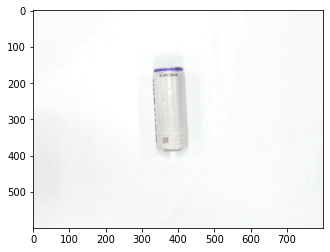

In [18]:
img = cv2.imread("object_frames/transparent/borjomi/Picture 513.jpg")
plt.imshow(img)

In [3]:
w,h,d = img.shape

In [19]:
img = cv2.resize(img, (h//2,w//2))*3
img = cv2.GaussianBlur(img, (3, 3), 0)

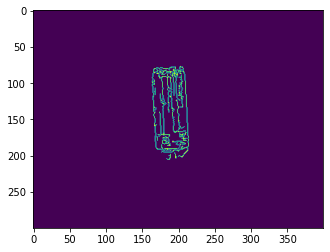

In [20]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny_output = cv2.Canny(img_grey, 50, 160)
plt.imshow(canny_output)

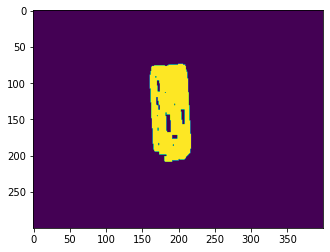

In [21]:
kernel_dil = np.ones((7, 7), np.uint8)
dilation_noise = cv2.dilate(canny_output, kernel_dil, iterations=1)
plt.imshow(dilation_noise)

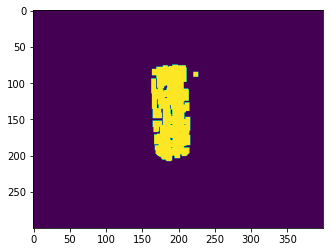

In [13]:
kernel_cl = np.ones((7,7),np.uint8)
closing_noise = cv2.morphologyEx(dilation_noise, cv2.MORPH_OPEN, kernel_cl)
plt.imshow(closing_noise)

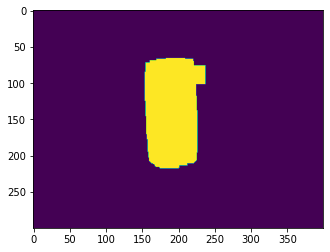

In [14]:
kernel_dil = np.ones((20, 20), np.uint8)
dilation = cv2.dilate(closing_noise, kernel_dil, iterations=1)
plt.imshow(dilation)

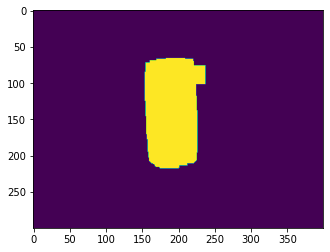

In [15]:
kernel_cl = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel_cl)
plt.imshow(closing)

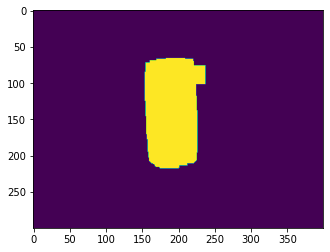

In [16]:
kernel_op = np.ones((7,7),np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel_op)
plt.imshow(opening)

In [88]:
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

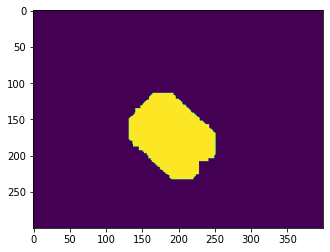

In [89]:
mask = np.zeros((canny_output.shape[0], canny_output.shape[1], 1), dtype=np.uint8)
biggest_c = max(contours, key = cv2.contourArea)
cv2.fillPoly(mask, pts = contours, color=255)
plt.imshow(mask)

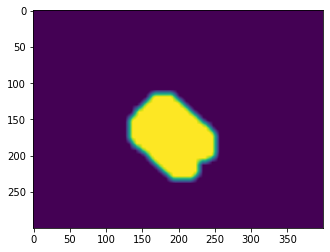

In [90]:
blurred_mask = cv2.blur(mask, (10, 10))
plt.imshow(blurred_mask)

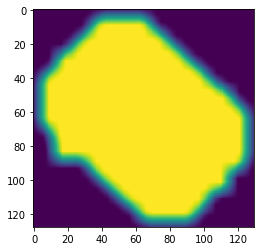

In [82]:
where = np.array(np.where(blurred_mask))
x1, y1 = np.amin(where, axis=1)
x2, y2 = np.amax(where, axis=1)
sub_image = blurred_mask[x1:x2, y1:y2]
plt.imshow(sub_image)

In [14]:
grey_mask = cv2.cvtColor(blurred_mask, cv2.COLOR_BGR2GRAY)
img_alph = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
img_alph[:, :, 3] = grey_mask
img_alph = cv2.resize(img_alph,(h,w))
plt.imshow(img_alph)

error: OpenCV(4.5.2) c:\users\runneradmin\appdata\local\temp\pip-req-build-_8k9tw8n\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x57b9ffbe::Set<1,-1,-1>,struct cv::impl::A0x57b9ffbe::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
img_alph[:, :, 3]